In [12]:
%matplotlib notebook
import math, random
from operator import itemgetter
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

(181, 181)


<IPython.core.display.Javascript object>


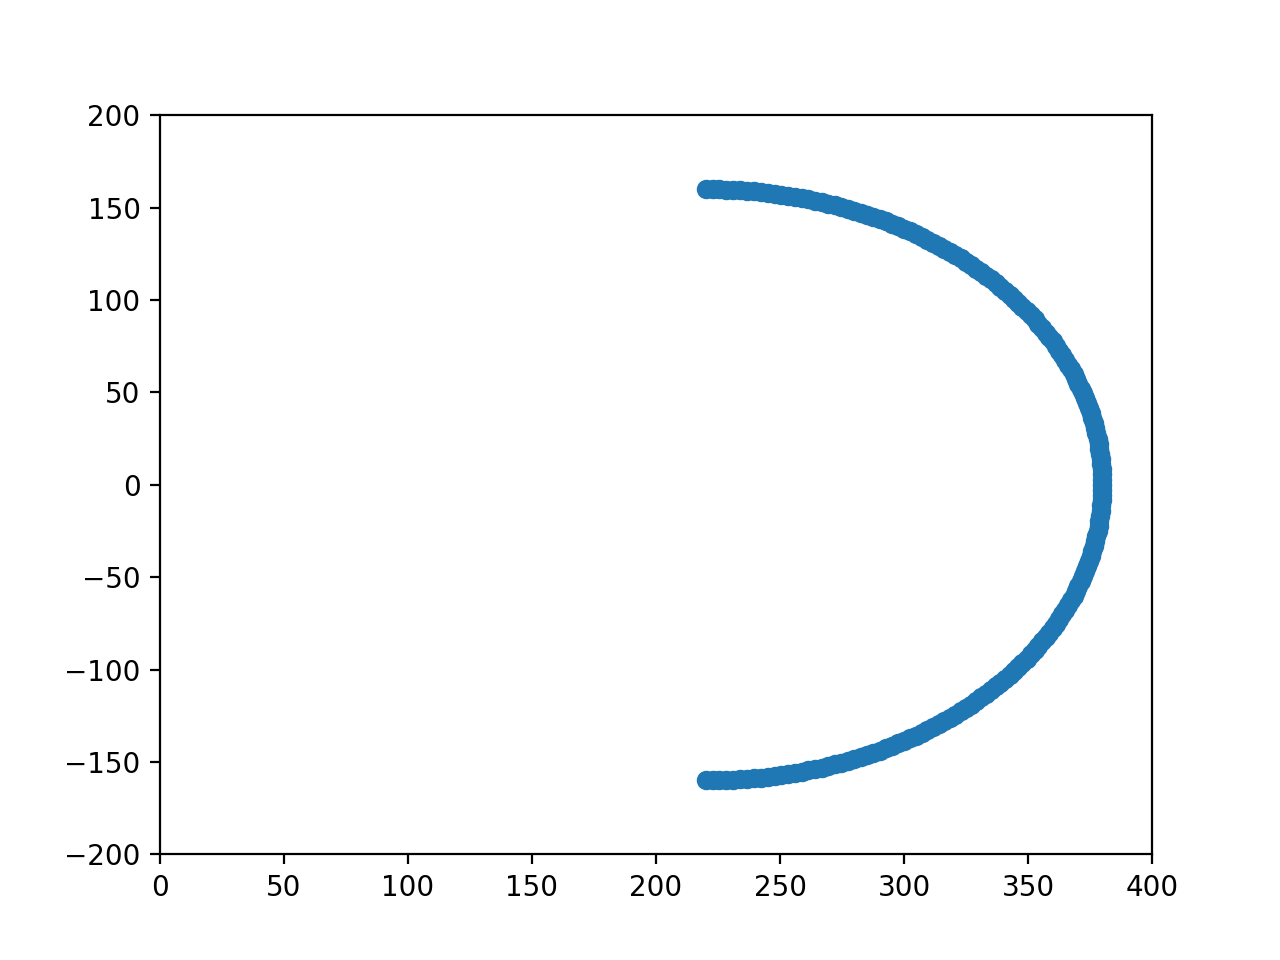

(-200, 200)

In [18]:
x_max = 90
x_min = -90

y_max = 90
y_min = -90

z_max = 720
z_min = 0

x_inc = 1 #degree
y_inc = 1 #degree
z_inc = 1 #degree

l1 = 160
l2 = 220
l3 = l1 + l2

x_cnt = x_min

pairs = []
for i in range(x_min, x_max + x_inc, x_inc):
    pairs.append((i, -i))

def getPosition(pair):
    angle_x = pair[0] / 180.0 * math.pi
    angle_y = pair[1] / 180.0 * math.pi
    x = l1 * math.cos(angle_x) + l2 * math.cos(angle_x + angle_y)
    y = l1 * math.sin(angle_x) + l2 * math.sin(angle_x + angle_y)
    # pos_pair = (int(x), int(y))
    pos_pair = (x, y)
    # print (pair, pos_pair)
    return (pos_pair)

x_pos = []
y_pos = []
for i in pairs:
    res = getPosition(i)
    x_pos.append(res[0])
    y_pos.append(res[1])
print(len(x_pos), len(y_pos))
pen_fig = plt.figure()
ax1 = pen_fig.add_subplot(111)
ax1.scatter(x_pos, y_pos)
ax1.set_xlim(xmin=0, xmax=400)
ax1.set_ylim(ymin=-200, ymax=200)

<IPython.core.display.Javascript object>


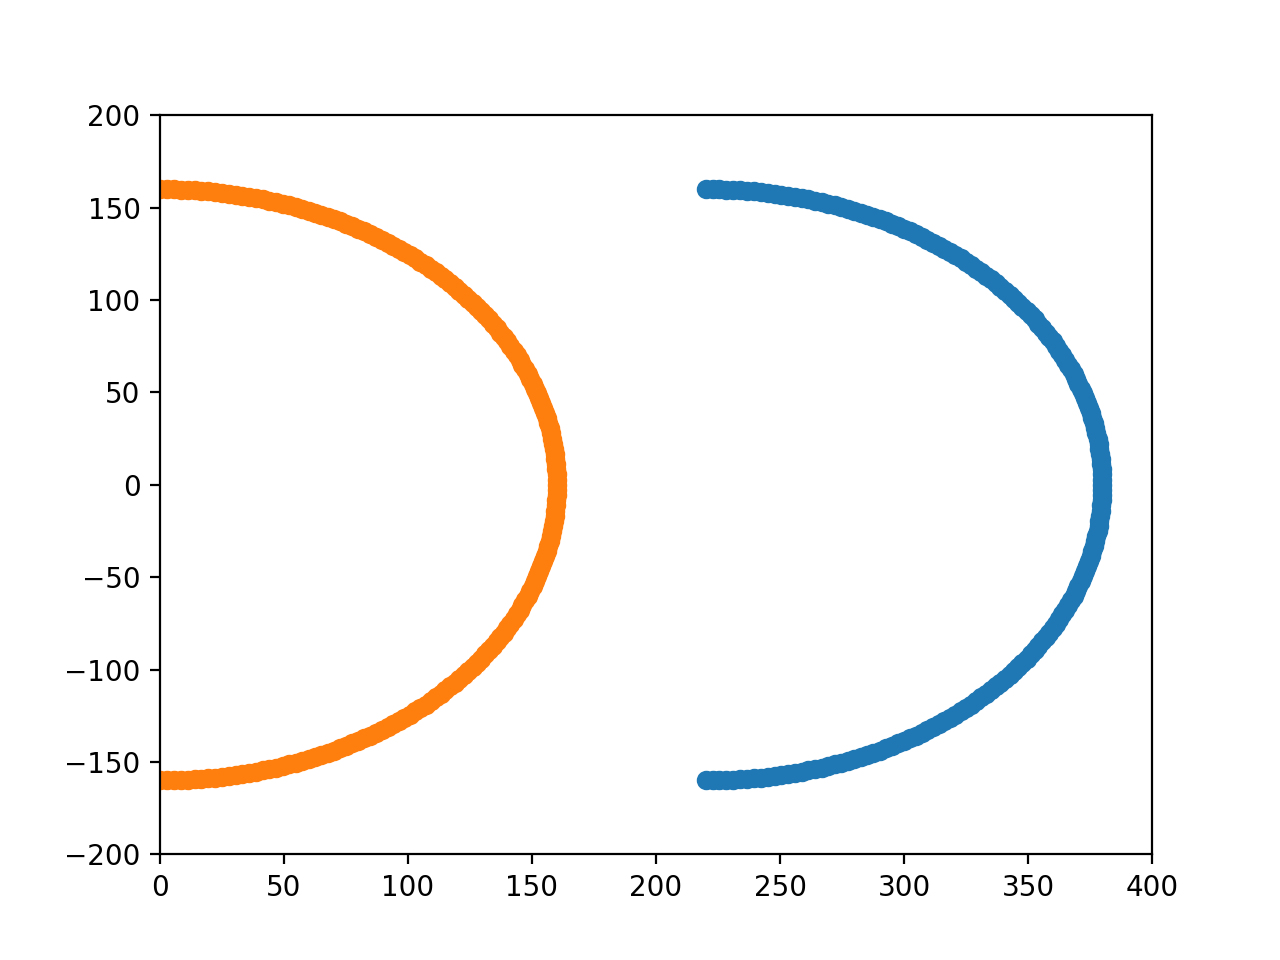

(-200, 200)

In [19]:
def getNeckPosition(pair):
    angle_x = pair[0] / 180.0 * math.pi
    #angle_y = pair[1] / 180.0 * math.pi
    x = l1 * math.cos(angle_x)
    y = l1 * math.sin(angle_x)
    return (x, y)

x_zero, y_zero = [], []
for i in pairs:
    res = getNeckPosition(i)
    x_zero.append(res[0])
    y_zero.append(res[1])
neck_fig = plt.figure()
ax2 = neck_fig.add_subplot(111)
ax2.scatter(x_pos, y_pos)
ax2.scatter(x_zero, y_zero)
ax2.set_xlim(xmin=0, xmax=400)
ax2.set_ylim(ymin=-200, ymax=200)

<IPython.core.display.Javascript object>


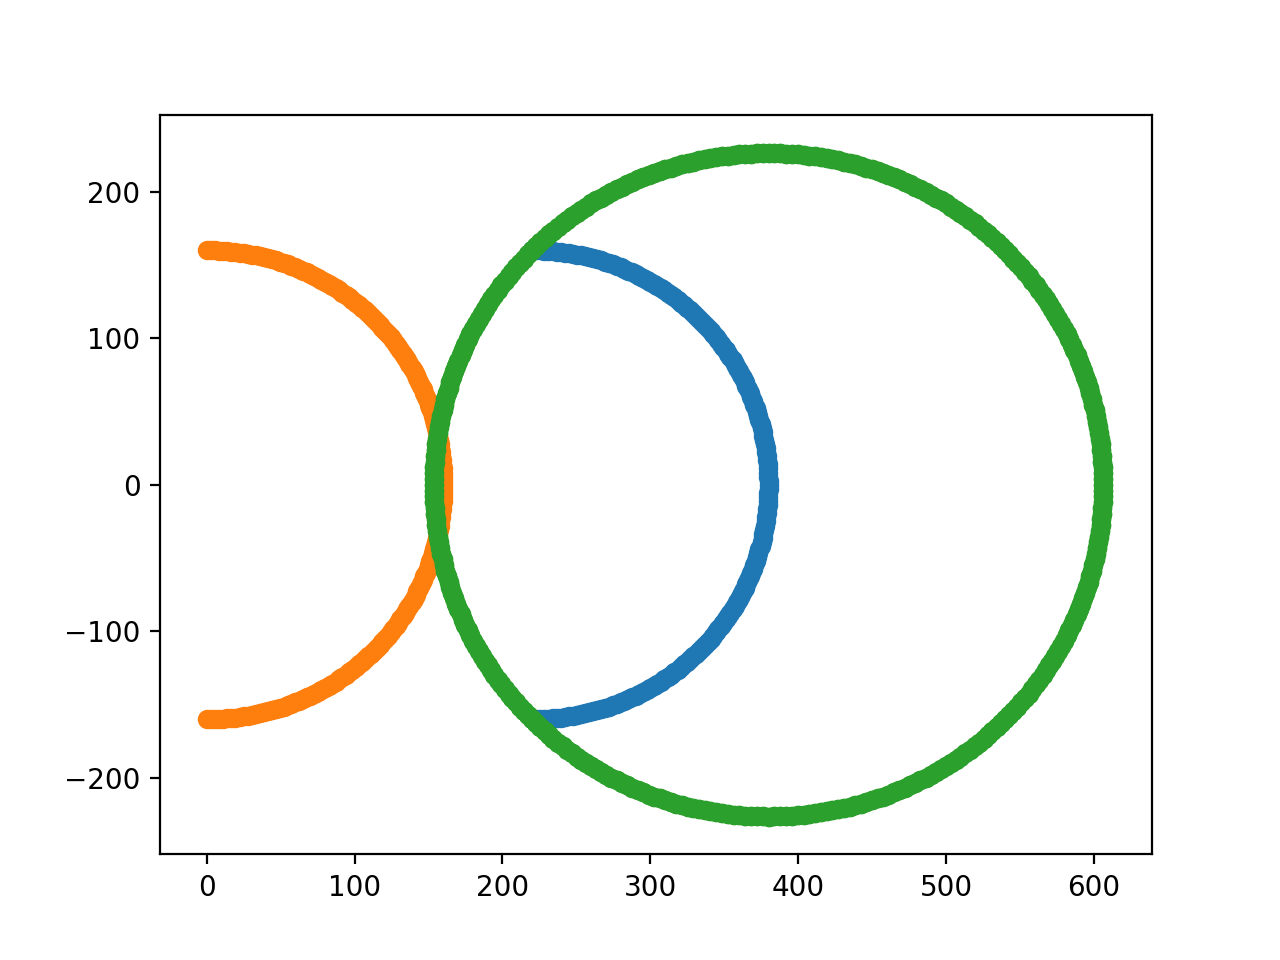

In [20]:
def dist(a1, a2):
    x_delta = a1[0] - a2[0]
    y_delta = a1[1] - a2[1]
    
    return (math.sqrt(math.pow(x_delta, 2) + math.pow(y_delta, 2)))

def plateEdgePnts(x_pnts, y_pnts):
    global z_min, z_max, z_inc
    x_rot, y_rot = [], []
    x_pt1, y_pt1 = getPosition((90, -90))
    x_pt2, y_pt2 = getPosition((0, 0))
    r = dist((x_pt1, y_pt1), (x_pt2, y_pt2))
    for ang in range(z_min, z_max, z_inc):
        a = ang / 180.0 * math.pi
        #for i in range(len(x_pnts)):
         #   x_rot.append(math.cos(a) * (x_pnts[i]) - math.sin(a) * x_pnts[i])
          #  y_rot.append(math.sin(a) * y_pnts[i] + math.cos(a) * y_pnts[i])
        x_rot.append(math.cos(a) * r + l3)
        y_rot.append(math.sin(a) * r)
    return (x_rot, y_rot)

x_rot, y_rot = plateEdgePnts(x_pos, y_pos)
plate_fig = plt.figure()
ax3 = plate_fig.add_subplot(111)
ax3.scatter(x_pos, y_pos)
ax3.scatter(x_zero, y_zero)
ax3.scatter(x_rot, y_rot)

<IPython.core.display.Javascript object>


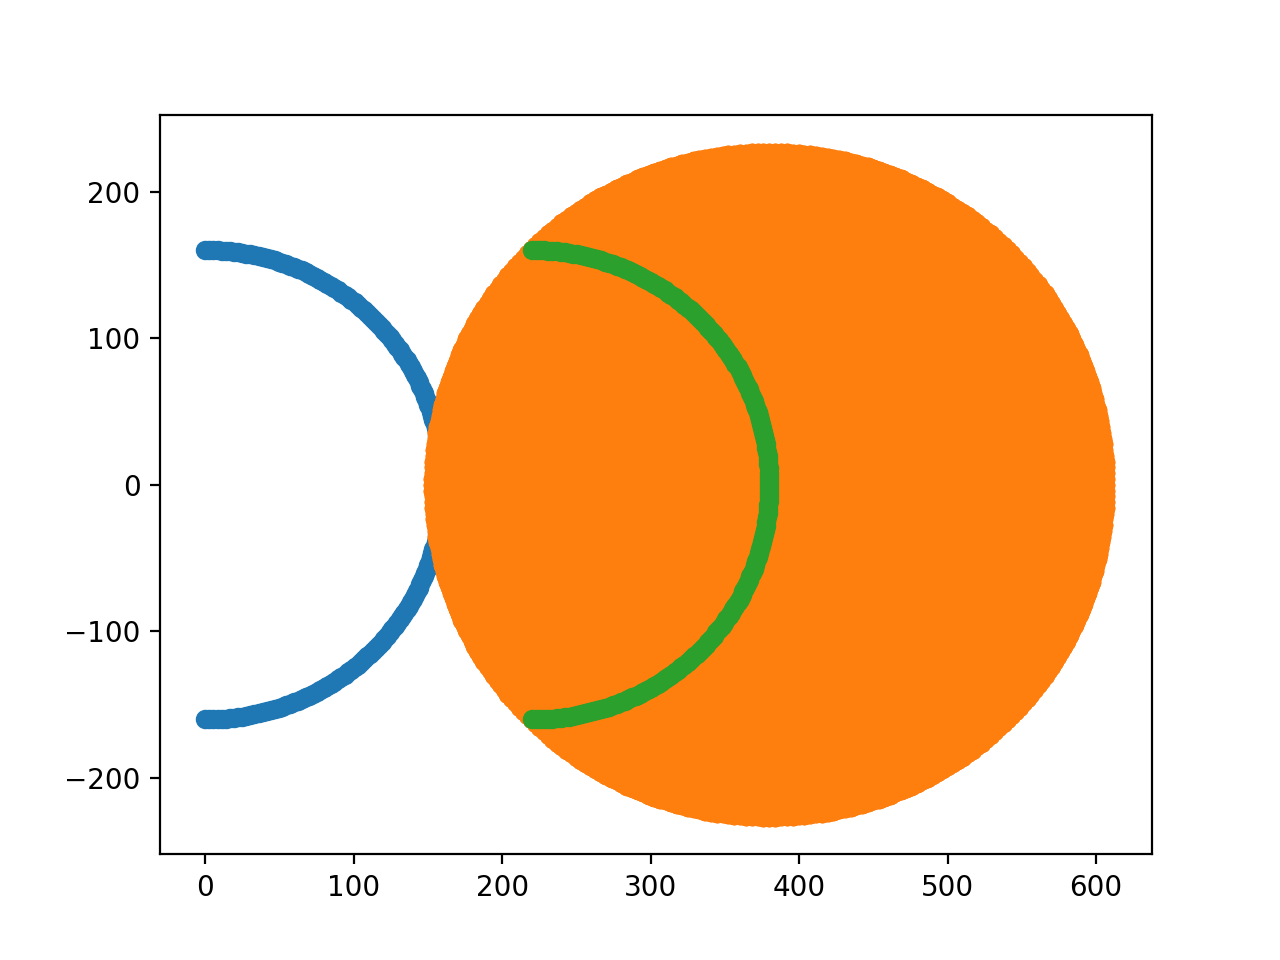

In [21]:
def transform(pnt, cnt, ang):
    
    a = ang / 180.0 * math.pi
    
    x_1 = pnt[0] - cnt[0]
    y_1 = pnt[1] - cnt[1]
    
    x_2 = math.cos(a) * x_1 - math.sin(a) * y_1
    y_2 = math.sin(a) * x_1 + math.cos(a) * y_1
    
    x_2 += cnt[0]
    y_2 += cnt[1]
    
    return (x_2, y_2)

def rotatePnts(x_pnts, y_pnts, a_pnts):
    global z_min, z_max, z_inc
    x_rot, y_rot, a_rot = [], [], []
    x_pt2, y_pt2 = getPosition((0, 0))
    for ang in range(z_min, z_max, z_inc):
        a = ang / 180.0 * math.pi
        for i in range(len(x_pnts)):
            r = dist((x_pnts[i], y_pnts[i]), (x_pt2, y_pt2))
            x_val, y_val = transform((x_pnts[i], y_pnts[i]), (l3, 0), ang)
            x_rot.append(x_val)
            y_rot.append(y_val)
            a_rot.append((a_pnts[i][0], a_pnts[i][1], ang))
    return (x_rot, y_rot, a_rot)

x_rot, y_rot, a_rot = rotatePnts(x_pos, y_pos, pairs)
draw_fig = plt.figure()
ax4 = draw_fig.add_subplot(111)

ax4.scatter(x_zero, y_zero)
ax4.scatter(x_rot, y_rot)
ax4.scatter(x_pos, y_pos)

<IPython.core.display.Javascript object>


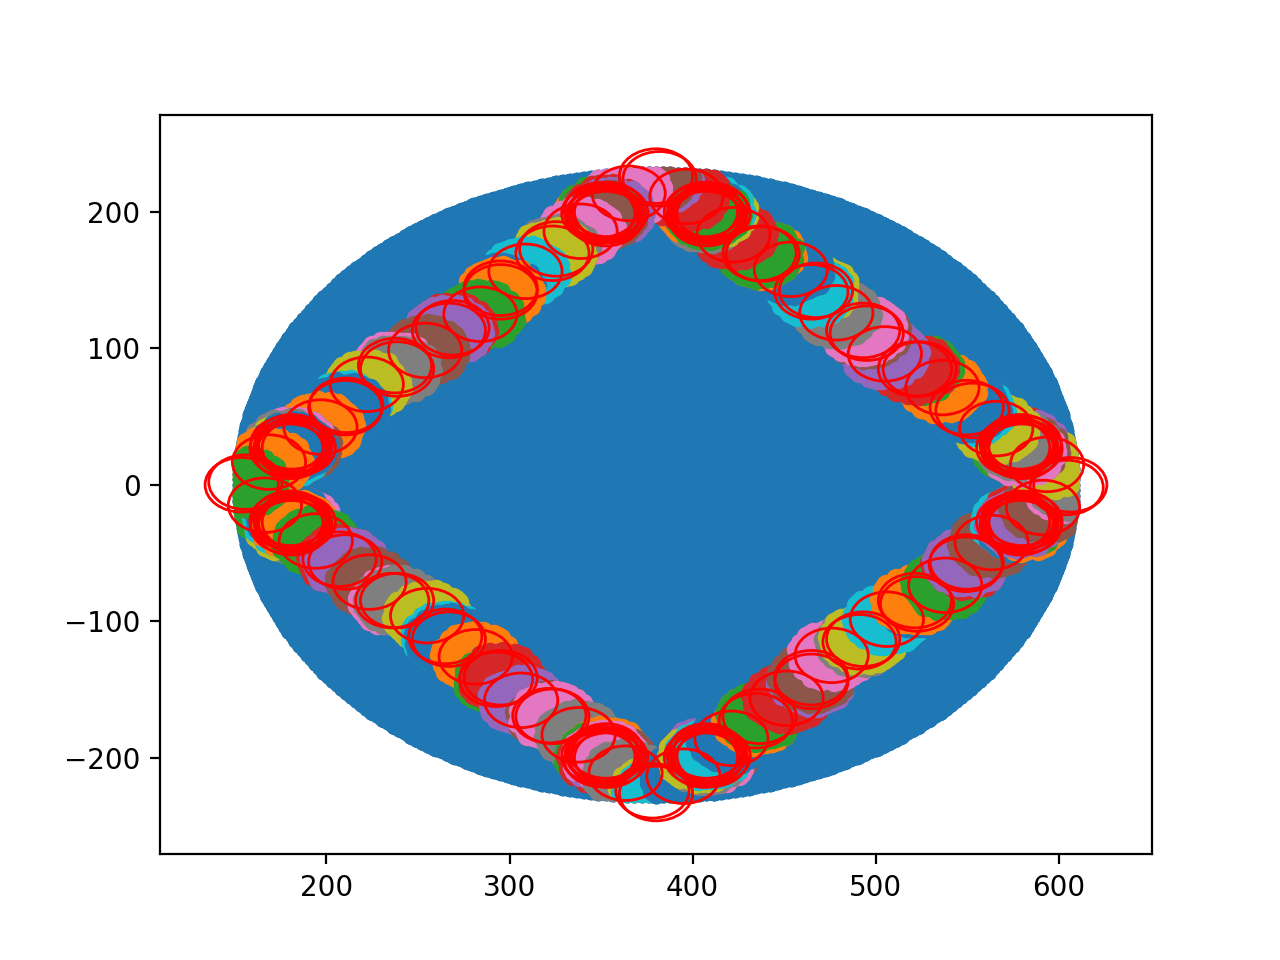

In [22]:
pnt_set = []
sort_pnts = zip(x_rot, y_rot, a_rot)
"""
sort_pnts.sort(key=lambda x: x[0])
pnt_set.append(sort_pnts[0])
pnt_set.append(sort_pnts[-1])
sort_pnts.sort(key=lambda x: x[1])
pnt_set.append(sort_pnts[0])
pnt_set.append(sort_pnts[-1])
"""

pnt_set.append((153.72583002030478, 1.4210854715202004e-14, (90, -90, 45)))
pnt_set.append((379.9999999999997, -226.27416997969522, (90, -90, 135)))
pnt_set.append((606.2741699796952, 1.1368683772161603e-13, (90, -90, 225)))
pnt_set.append((380.0000000000003, 226.27416997969522, (90, -90, 315)))
pnt_set.append((153.72583002030478, 1.4210854715202004e-14, (90, -90, 405)))

def getMidpnt(p1, p2):
    mid_x = (p1[0] + p2[0]) / 2
    mid_y = (p1[1] + p2[1]) / 2
    sub_ang = (0,0,0)
    for pnt in sort_pnts:
        if (abs(pnt[0] - mid_x) <= 2) and (abs(pnt[1] - mid_y) <= 2)\
        and (((p1[2][2] - pnt[2][2]) * (pnt[2][2] - p2[2][2])) > 0):
            sub_ang = pnt[2]
    mid = (mid_x, mid_y, (sub_ang))
    return (mid)
    
d_max = 50
def checkPnts(p1, p2):
    ret_list = []
    if (dist(p1, p2) <= d_max):
        ret_list = ret_list + [p1] + [p2]
        return (ret_list)
    else:
        mid_pnt = getMidpnt(p1, p2)
        ret_list = ret_list + checkPnts(p1, mid_pnt) + checkPnts(mid_pnt, p2)
        return (ret_list)

square_set = []
for i in range(len(pnt_set)):
    if (i < len(pnt_set) - 1):
        p1, p2 = pnt_set[i], pnt_set[i + 1]
    else:
        p1, p2 = pnt_set[i], pnt_set[0]
    square_set = square_set + checkPnts(p1, p2)

line_seg = []
for i in range(len(square_set)):
    if (i == len(square_set) - 1):
        line_seg.append((square_set[i], square_set[0]))
    else:
        line_seg.append((square_set[i], square_set[i + 1]))
        
k_z = 20
def CableDist(a1, a2):
    angle_a_delta = a1[2][0] - a2[2][0]
    angle_b_delta = a1[2][1] - a2[2][1]
    angle_z_delta = a1[2][2] - a2[2][2]
    
    return (math.pow(angle_a_delta, 2) + math.pow(angle_b_delta, 2) + k_z * math.pow(angle_z_delta, 2))

def CartSpace(a1, a2):
    x_delta = a1[0] - a2[0]
    y_delta = a1[1] - a2[1]
    
    return (math.pow(x_delta, 2) + math.pow(y_delta, 2))

def Locality(a, r, space, trajectory):
    local_pnt = []
    for e in space:
        if (e in trajectory):
            continue
        if (CartSpace(e, a) <= math.pow(r, 2)) and (abs(e[2][2] - a[2][2]) < 90):
            #print (CartSpace(e, a))
            local_pnt.append(e)
    return (local_pnt)

draw_fig3 = plt.figure()
ax6 = draw_fig3.add_subplot(111)
ax6.scatter(x_rot, y_rot)

def getWeight2(n_pnt, c_pnt, e_pnt):
    cn_delta_x = n_pnt[0] - c_pnt[0]
    cn_delta_y = n_pnt[1] - c_pnt[1]
    ce_delta_x = e_pnt[0] - c_pnt[0]
    ce_delta_y = e_pnt[1] - c_pnt[1]

    return ((ce_delta_x * cn_delta_x) + (ce_delta_y * cn_delta_y))

def getWeight(n_pnt, c_pnt, e_pnt):
    ne_delta_x = n_pnt[0] - e_pnt[0]
    ne_delta_y = n_pnt[1] - e_pnt[1]
    
    return (math.pow(ne_delta_x, 2) + math.pow(ne_delta_y, 2))

k = .01
r = 20
eps = 2
f = open('points_square.txt', 'w')

for segs in range(len(line_seg)):
    A, B = line_seg[segs]
    cur_pnt = A
    pass_pnts = []
    for i in range(10):
    #    cur_val = CartSpace(B, cur_pnt) + (k * CableDist(B, cur_pnt))
        f.write("%f %f %f\n"%(cur_pnt[2]))
        cur_val = CartSpace(cur_pnt, B)
        if (cur_val < eps):
            break;
        pass_pnts.append(cur_pnt)
        circle = plt.Circle((cur_pnt[0], cur_pnt[1]), r, color='r', fill=False)
        x_p, y_p = getNeckPosition(cur_pnt[2])
    #    ax6.plot([0, x_p], [0, y_p], c=c[i % 10])
    #    ax6.plot([x_p, cur_pnt[0]], [y_p, cur_pnt[1]], c=c[i % 10])
        loc = Locality(cur_pnt, r, sort_pnts, pass_pnts)
        #print(loc)
        if not (loc):
            break
        loc_x, loc_y, loc_a = zip(*loc)
        ax6.scatter(loc_x, loc_y)
        loc_m = 0;
        #min_val = CartSpace(B, loc[loc_min]) + (k * CableDist(B, loc[loc_min]))
        m_val = getWeight(loc[loc_m], cur_pnt, B)  + (k * CableDist(loc[loc_m], cur_pnt))
        #print(loc[loc_m], m_val)
        for j in range(1, len(loc)):
            #val = (CartSpace(B, loc[j]) + (k * CableDist(B, loc[j])))
            val = getWeight(loc[j], cur_pnt, B) + (k * CableDist(loc[j], cur_pnt))
            if (val < m_val):
                m_val = val
                loc_m = j
        cur_pnt = loc[loc_m]
        ax6.add_patch(circle)
    #traj_x, traj_y, traj_ang = zip(*pass_pnts)
    #ax6.scatter(traj_x, traj_y)
f.close()


In [23]:
import sys
import math
import fileinput

data_cnt = 0

dataIn = open("points_square.txt", "r")
dataOut = open("square.gcode", "w")
angles = []
for line in dataIn:
    line = line[0:-2]
    vals = line.split(' ')
    angles.append((float(vals[0]), float(vals[1]), float(vals[2])))
dataIn.close()
dataOut.write("G0 X0 Y0 Z0\n")
for i in angles:
    x = round(i[1]) + round(i[0])
    y = round(i[0])
    z = round(i[2])
    dataOut.write("G0 X%d Y%d Z%d\n" % (int(x), int(y), int(z)))
dataOut.write("G0 X0 Y0 Z0\n")
dataOut.close()